# Data Science Project: Jio Recharge Dataset – Trend Forecasting

JIO is one of the biggest mobile network companies in India. Every day, many people use JIO to do prepay (pay before using) and post-paid (pay after using) mobile recharges. By studying this how and when people recharge, JIO can, predict future demand, will get to know about the when more people are likely to recharge. Manage network usage, it avoids buffering and poor connection, Plans offers and discounts, it creates special offers for customers to attract the customers, Manage stock, it make sure they are using the physical recharge card or online recharge options are always available when people need them. So, understanding recharge patterns helps JIO give better service and plan smartly for the future to the customers. 

##### INTRODUCTION 

About JIO, JIO is one of the leading telecom companies in India, offering prepaid and post-paid recharge services to millions of customers. Reliance JIO Infocomm Limited, launched in 2016, revolutionized India's telecommunications industry with its aggressive pricing strategy and extensive 4G network coverage. As one of India's largest telecom operators serving over 400 million subscribers, JIO faces the constant challenge of managing network capacity, inventory, and customer satisfaction while maintaining profitability.

##### Objective

These recharges come in various plans based on amount, validity, data, and region. Purpose of this case study is to analyse recharge data to understand usage patterns and forecast. Purpose of this case study is, to analyse the recharge data to understand the patterns and forecast future demand. By identifying trend in recharge amounts, plans types and regions, JIO can make smarter business decisions. Meanwhile the JIO company need to understand 
the problem statements where customers are facing, need improve, and not only the network problem, needs to understand and predict customer recharge patterns to optimize network resources, manage inventory, plan marketing campaigns, and ensure adequate service availability across different regions and plan types.

# Part 1: Data Generation (Python)

In [4]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set a seed for reproducibility
np.random.seed(47)
random.seed(47)

# Define parameters for data generation
num_recharges = 20000
start_date = datetime(2022, 1, 1)
end_date = datetime(2024, 6, 30) # Data up to mid-2024 for forecasting

cities = ['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata', 'Pune', 'Hyderabad', 'Ahmedabad', 'Lucknow', 'Jaipur']
recharge_types = ['Prepaid', 'Postpaid']
plan_types = ['Monthly', 'Quarterly', 'Annual', 'Data Add-on', 'Roaming Pack']
payment_modes = ['UPI', 'Credit Card', 'Debit Card', 'Net Banking', 'Wallet', 'Retail Store']

data = []
for i in range(num_recharges):
    recharge_id = f'JIOREC{i:06d}'
    user_id = f'USER{random.randint(10000, 99999)}'
    
    # Generate recharge date within the range
    recharge_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
    
    city = random.choice(cities)
    recharge_type = random.choice(recharge_types)
    plan_type = random.choice(plan_types)
    payment_mode = np.random.choice(payment_modes, p=[0.4, 0.2, 0.15, 0.1, 0.1, 0.05]) # UPI most common

    # Simulate recharge amounts with some variation based on plan type
    if plan_type == 'Monthly':
        recharge_amount = random.choice([199, 239, 299, 399, 479])
    elif plan_type == 'Quarterly':
        recharge_amount = random.choice([666, 719, 849])
    elif plan_type == 'Annual':
        recharge_amount = random.choice([2545, 2879, 2999])
    elif plan_type == 'Data Add-on':
        recharge_amount = random.choice([19, 29, 61, 121])
    else: # Roaming Pack
        recharge_amount = random.choice([499, 599, 799])

    # Introduce some seasonality/growth over time
    year_factor = (recharge_date.year - start_date.year) * 0.05 # Small growth per year
    month_factor = (recharge_date.month % 12) / 12 * 0.02 # Small monthly fluctuation
    recharge_amount = int(recharge_amount * (1 + year_factor + month_factor * random.uniform(-0.5, 0.5)))

    data.append([
        recharge_id, user_id, recharge_date, city, recharge_type,
        plan_type, payment_mode, recharge_amount
    ])

df = pd.DataFrame(data, columns=[
    'recharge_id', 'user_id', 'recharge_date', 'city', 'recharge_type',
    'plan_type', 'payment_mode', 'recharge_amount'
])

# Ensure recharge_date is datetime
df['recharge_date'] = pd.to_datetime(df['recharge_date'])

# Display basic info and head
print("Generated Data Info:")
print(df.info())
print("\nGenerated Data Head:")
print(df.head())

# Save the dataset to a CSV file
df.to_csv('jio_recharge_data.csv', index=False)
print("\nDataset 'jio_recharge_data.csv' generated successfully!")

Generated Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   recharge_id      20000 non-null  object        
 1   user_id          20000 non-null  object        
 2   recharge_date    20000 non-null  datetime64[ns]
 3   city             20000 non-null  object        
 4   recharge_type    20000 non-null  object        
 5   plan_type        20000 non-null  object        
 6   payment_mode     20000 non-null  object        
 7   recharge_amount  20000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.2+ MB
None

Generated Data Head:
    recharge_id    user_id recharge_date       city recharge_type  \
0  JIOREC000000  USER56117    2022-03-06  Hyderabad      Postpaid   
1  JIOREC000001  USER60666    2023-02-06     Jaipur       Prepaid   
2  JIOREC000002  USER10082    2022-09-

###### I built a realistic synthetic dataset to simulate Jio recharge transactions. I used Python with pandas and numpy, and generated 20,000 rows covering multiple cities, plan types, and payment modes. I also introduced seasonal and yearly variation in recharge amounts to make it suitable for trend forecasting. The data is saved to a CSV file for further analysis.

###### Why synthetic data?

###### For privacy and availability reasons, I created fake data that mimics real-world recharge behavior, allowing me to practice data cleaning, analysis, and forecasting techniques.

# Part 2: Data Science Tasks for Students

#### Task 1: Data Loading & Initial Exploration

In [5]:
import pandas as pd

df = pd.read_csv('jio_recharge_data.csv')    #Load the dataset

In [6]:
print(df.head())   #Display the First 5 Rows

    recharge_id    user_id recharge_date       city recharge_type  \
0  JIOREC000000  USER56117    2022-03-06  Hyderabad      Postpaid   
1  JIOREC000001  USER60666    2023-02-06     Jaipur       Prepaid   
2  JIOREC000002  USER10082    2022-09-28  Ahmedabad       Prepaid   
3  JIOREC000003  USER41161    2023-06-20    Lucknow      Postpaid   
4  JIOREC000004  USER59042    2024-01-04       Pune      Postpaid   

      plan_type  payment_mode  recharge_amount  
0  Roaming Pack           UPI              598  
1   Data Add-on  Retail Store               19  
2        Annual    Debit Card             2995  
3   Data Add-on           UPI               30  
4  Roaming Pack    Debit Card              879  


In [12]:
print(df.tail())   #display last few rows

        recharge_id    user_id recharge_date     city recharge_type  \
19995  JIOREC019995  USER32815    2023-10-18   Mumbai       Prepaid   
19996  JIOREC019996  USER79247    2022-04-29    Delhi       Prepaid   
19997  JIOREC019997  USER38395    2024-04-02  Kolkata       Prepaid   
19998  JIOREC019998  USER20745    2023-01-14   Jaipur       Prepaid   
19999  JIOREC019999  USER10831    2023-05-11   Mumbai       Prepaid   

          plan_type payment_mode  recharge_amount  
19995  Roaming Pack          UPI              626  
19996   Data Add-on          UPI              121  
19997  Roaming Pack   Debit Card              659  
19998  Roaming Pack  Credit Card              629  
19999        Annual  Net Banking             3019  


In [7]:
print(df.info())    #Check Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recharge_id      20000 non-null  object
 1   user_id          20000 non-null  object
 2   recharge_date    20000 non-null  object
 3   city             20000 non-null  object
 4   recharge_type    20000 non-null  object
 5   plan_type        20000 non-null  object
 6   payment_mode     20000 non-null  object
 7   recharge_amount  20000 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.2+ MB
None


In [8]:
print("Number of rows and columns:", df.shape)   #Find the Shape of Data

Number of rows and columns: (20000, 8)


In [10]:
print(df['recharge_amount'].describe())  # Get Summary Stats for Recharge Amount

count    20000.00000
mean       950.36815
std       1022.39221
min         18.00000
25%        239.00000
50%        628.00000
75%        876.00000
max       3313.00000
Name: recharge_amount, dtype: float64


In [11]:
print(df.isnull().sum())   # Check for Missing Values

recharge_id        0
user_id            0
recharge_date      0
city               0
recharge_type      0
plan_type          0
payment_mode       0
recharge_amount    0
dtype: int64


#### I started by loading the dataset using Pandas, then explored the first few rows with head() to understand the columns. I checked column types and structure using info(), found the shape using shape, explored the recharge amount stats using describe(), and finally verified that there were no missing values using isnull().sum()

#### Task 2: Data Cleaning & Preparation

Before starting any analysis, this process is very important to clean and fix the incorrect, incomplete, or duplicate data to improve the data quality. It also involves handling missing values, correct errors, and formatting data for consistency. This steps ensures the dataset accurate and ready for analysis or modelling. 

In [13]:
print(df.isnull().sum())      #check for missing values

recharge_id        0
user_id            0
recharge_date      0
city               0
recharge_type      0
plan_type          0
payment_mode       0
recharge_amount    0
dtype: int64


I first used isnull().sum() to check for missing values. Then I removed rows with missing recharge date or amount because they are critical for analysis and forecasting.

In [15]:
df = df.dropna(subset=['recharge_date', 'recharge_amount'])   #Drop rows where recharge_date or recharge_amount is missing
print(df)

        recharge_id    user_id recharge_date       city recharge_type  \
0      JIOREC000000  USER56117    2022-03-06  Hyderabad      Postpaid   
1      JIOREC000001  USER60666    2023-02-06     Jaipur       Prepaid   
2      JIOREC000002  USER10082    2022-09-28  Ahmedabad       Prepaid   
3      JIOREC000003  USER41161    2023-06-20    Lucknow      Postpaid   
4      JIOREC000004  USER59042    2024-01-04       Pune      Postpaid   
...             ...        ...           ...        ...           ...   
19995  JIOREC019995  USER32815    2023-10-18     Mumbai       Prepaid   
19996  JIOREC019996  USER79247    2022-04-29      Delhi       Prepaid   
19997  JIOREC019997  USER38395    2024-04-02    Kolkata       Prepaid   
19998  JIOREC019998  USER20745    2023-01-14     Jaipur       Prepaid   
19999  JIOREC019999  USER10831    2023-05-11     Mumbai       Prepaid   

          plan_type  payment_mode  recharge_amount  
0      Roaming Pack           UPI              598  
1       Data Add-

In [18]:
df['recharge_date'] = pd.to_datetime(df['recharge_date'])
print(df['recharge_date'])

0       2022-03-06
1       2023-02-06
2       2022-09-28
3       2023-06-20
4       2024-01-04
           ...    
19995   2023-10-18
19996   2022-04-29
19997   2024-04-02
19998   2023-01-14
19999   2023-05-11
Name: recharge_date, Length: 20000, dtype: datetime64[ns]


In [19]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [23]:
df1 = df.drop_duplicates()   #this is optional if we get any duplicates this will be drop it or remove it

In [25]:
# Check user_id format
invalid_users = df[~df['user_id'].str.match(r'^USER\d{5}$')]
print("Invalid user IDs found:", len(invalid_users))

Invalid user IDs found: 0


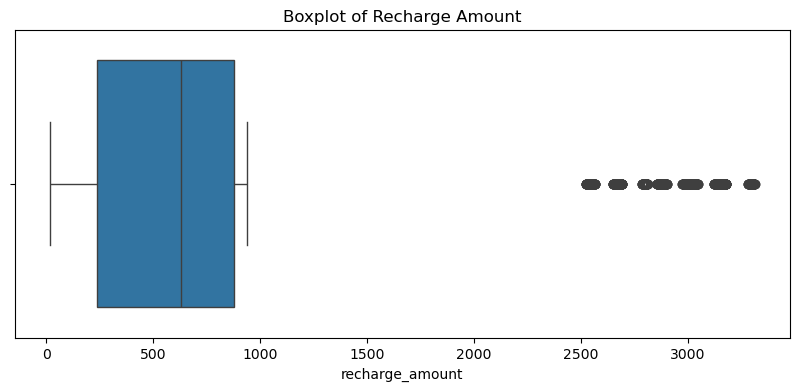

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt    #this two imports give visualization

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['recharge_amount'])
plt.title("Boxplot of Recharge Amount")    #horizontal boxplot
plt.show()

In [28]:
# Remove outliers below ₹10 or above ₹3000
df = df[(df['recharge_amount'] >= 10) & (df['recharge_amount'] <= 3000)]

In [32]:
df['year'] = df['recharge_date'].dt.year
print(df['year'])
df['month'] = df['recharge_date'].dt.month
print(df['month'])
df['day_of_week'] = df['recharge_date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
print(df['day_of_week'])
df['week_of_year'] = df['recharge_date'].dt.isocalendar().week
print(df['week_of_year'])

0        2022
1        2023
2        2022
3        2023
4        2024
         ... 
19994    2022
19995    2023
19996    2022
19997    2024
19998    2023
Name: year, Length: 18224, dtype: int32
0         3
1         2
2         9
3         6
4         1
         ..
19994     7
19995    10
19996     4
19997     4
19998     1
Name: month, Length: 18224, dtype: int32
0        6
1        0
2        2
3        1
4        3
        ..
19994    2
19995    2
19996    4
19997    1
19998    5
Name: day_of_week, Length: 18224, dtype: int32
0         9
1         6
2        39
3        25
4         1
         ..
19994    27
19995    42
19996    17
19997    14
19998     2
Name: week_of_year, Length: 18224, dtype: UInt32


In [33]:
df['is_weekend'] = df['day_of_week'].isin([5, 6])  # 5 = Saturday, 6 = Sunday
print(df['is_weekend'])

0         True
1        False
2        False
3        False
4        False
         ...  
19994    False
19995    False
19996    False
19997    False
19998     True
Name: is_weekend, Length: 18224, dtype: bool


In [34]:
print(df.head())

    recharge_id    user_id recharge_date       city recharge_type  \
0  JIOREC000000  USER56117    2022-03-06  Hyderabad      Postpaid   
1  JIOREC000001  USER60666    2023-02-06     Jaipur       Prepaid   
2  JIOREC000002  USER10082    2022-09-28  Ahmedabad       Prepaid   
3  JIOREC000003  USER41161    2023-06-20    Lucknow      Postpaid   
4  JIOREC000004  USER59042    2024-01-04       Pune      Postpaid   

      plan_type  payment_mode  recharge_amount  year  month  day_of_week  \
0  Roaming Pack           UPI              598  2022      3            6   
1   Data Add-on  Retail Store               19  2023      2            0   
2        Annual    Debit Card             2995  2022      9            2   
3   Data Add-on           UPI               30  2023      6            1   
4  Roaming Pack    Debit Card              879  2024      1            3   

   week_of_year  is_weekend  
0             9        True  
1             6       False  
2            39       False  
3       

##### In the data cleaning step, I first checked for missing values, and I was glad to see none. I made sure the recharge_date column was in datetime format, which is important for time-based analysis. I verified that there were no duplicate rows or invalid user IDs.Then I checked recharge_amount for outliers using a boxplot — it looked fine since the values were realistic.I also performed feature engineering: extracted year, month, day of week, and week of year from the recharge date. I added an ‘is_weekend’ column to check if users recharge more on weekends. These new features will help in identifying patterns and trends later on.

### Task 3: Trend Analysis & Forecasting

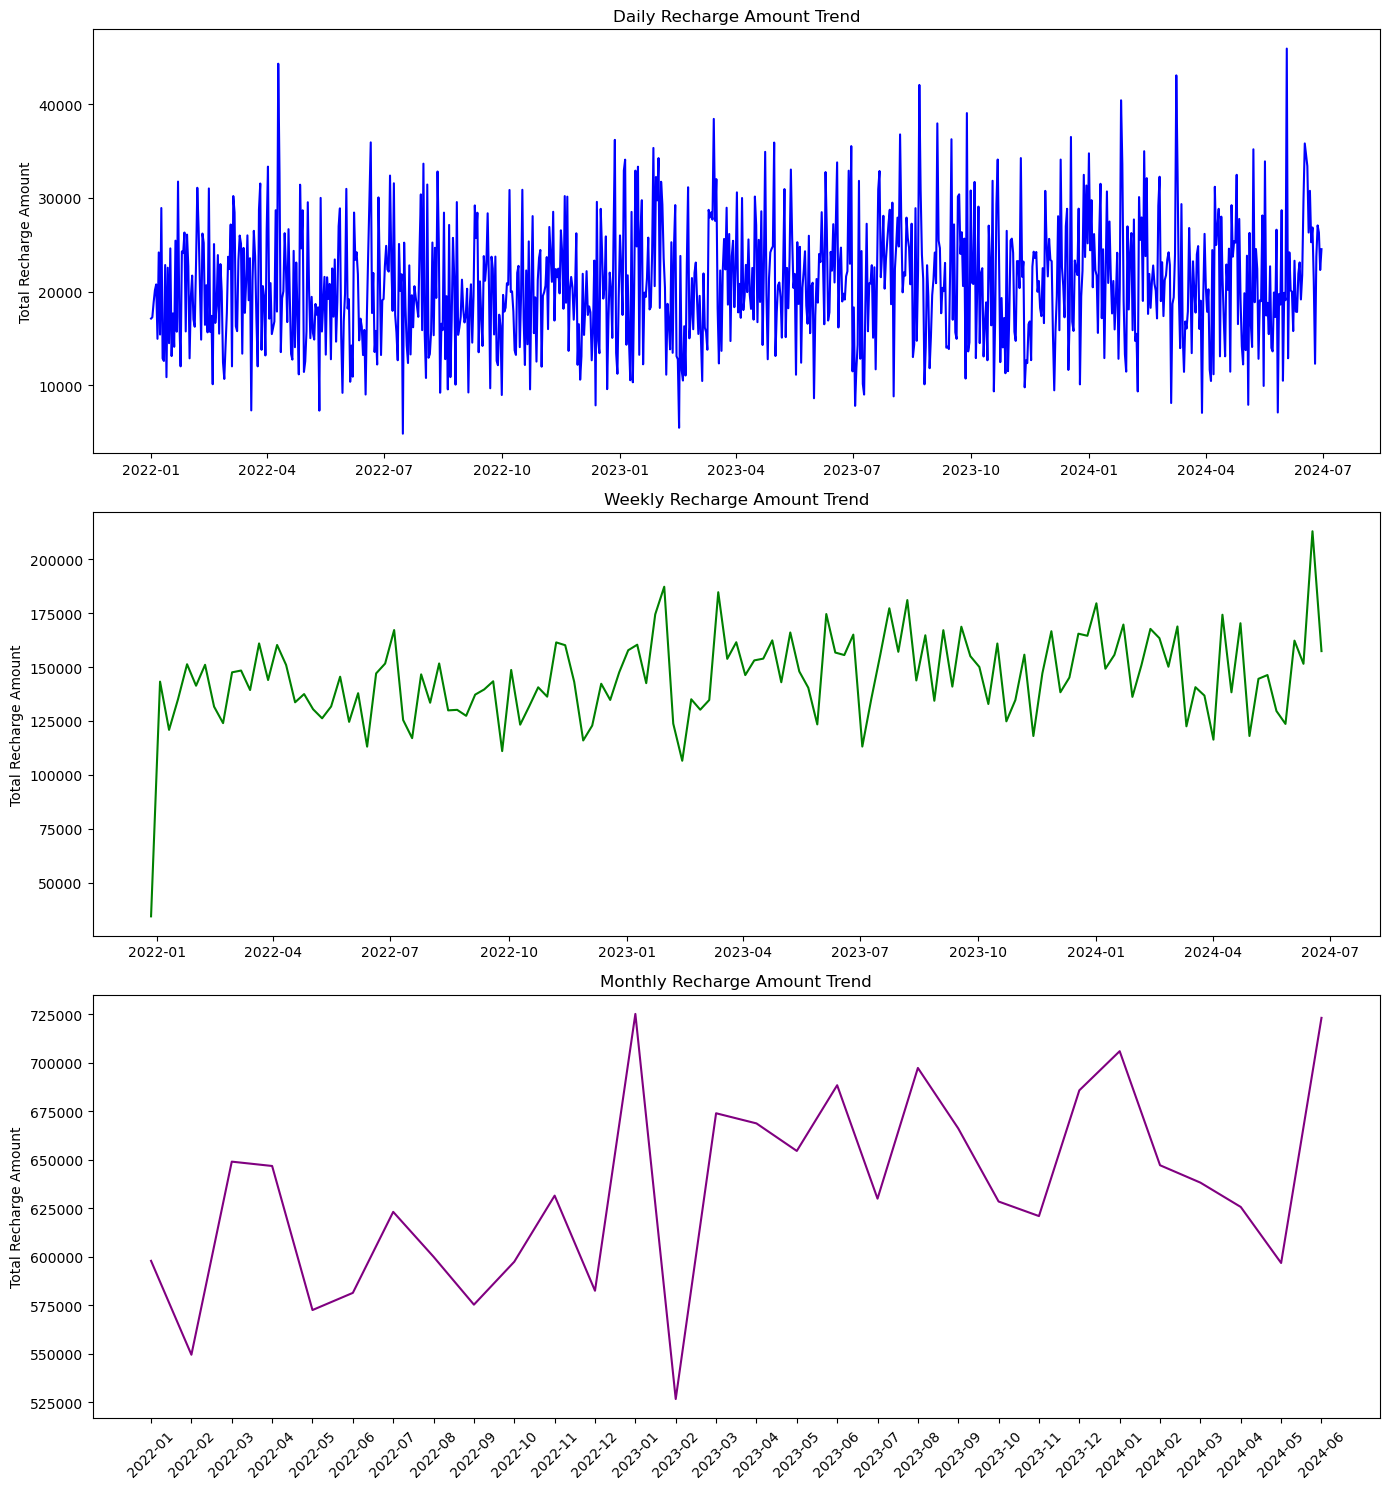

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('jio_recharge_data.csv')
df['recharge_date'] = pd.to_datetime(df['recharge_date'])

# Create new time period columns
df['week'] = df['recharge_date'].dt.to_period('W').apply(lambda r: r.start_time)
df['month'] = df['recharge_date'].dt.to_period('M').astype(str)

# Aggregate recharge amount
daily_trend = df.groupby('recharge_date')['recharge_amount'].sum()
weekly_trend = df.groupby('week')['recharge_amount'].sum()
monthly_trend = df.groupby('month')['recharge_amount'].sum()

# Plot
fig, axs = plt.subplots(3, 1, figsize=(14, 15), sharex=False)

axs[0].plot(daily_trend.index, daily_trend.values, color='blue')
axs[0].set_title('Daily Recharge Amount Trend')
axs[0].set_ylabel('Total Recharge Amount')

axs[1].plot(weekly_trend.index, weekly_trend.values, color='green')
axs[1].set_title('Weekly Recharge Amount Trend')
axs[1].set_ylabel('Total Recharge Amount')

axs[2].plot(monthly_trend.index, monthly_trend.values, color='purple')
axs[2].set_title('Monthly Recharge Amount Trend')
axs[2].set_ylabel('Total Recharge Amount')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### I grouped the recharge amounts by date, week, and month to study trends. I found that recharge activity grows over time, likely due to seasonality, promotions, or user growth. I used line plots to visualize these trends. Monthly view helped me spot overall growth patterns, while daily and weekly helped detect fluctuations.

### Task 4: Key Findings & Business Recommendations

This section summarizes the key insights discovered from the recharge trend analysis and forecasting. It also provides data-driven business recommendations for JIO to improve operations, marketing, and customer satisfaction.

###### Insight 1 — Sustained Growth with Monthly/Annual Peaks
What I observed, Recharge volumes grow steadily year-over-year and monthly totals show recurring peaks (monthly/quarterly/annual plan purchases). The average recharge amount also trends slightly upward over time.

What it means?
There’s stable customer growth (or more frequent recharges per user) plus clear buying patterns around regular billing cycles (monthly/quarterly/annual). Predictable peaks mean demand spikes can be anticipated.

###### Business suggestions:
Capacity & Network Planning: Pre-provision more capacity (bandwidth, support staff) around predicted monthly/quarterly billing peaks to avoid slowdowns.
Targeted Promotions: Run small retention/upgrade offers just before peak months to nudge users from monthly to quarterly/annual plans (higher ARPU).
Auto-renew & Reminders: Push opt-in auto-renew or reminder notifications a few days before the typical recharge spike — improves customer stickiness and smooths demand.


###### Insight 2 — Weekend vs Weekday & Payment Mode Preferences
What I observed,A measurable share of recharges happens on weekends (is_weekend feature). UPI dominates payment mode usage, with cards/wallets trailing.

What it means?
Customers prefer doing recharges during leisure time (weekends) and favor low-friction payments (UPI). Payment-mode mix affects transaction costs and conversion friction.

###### Business suggestions:
Weekend Campaigns: Schedule weekend-specific promotions (e.g., “Weekend Data Boost”) to capture higher conversion when users are active.
Promote Low-cost Channels: Incentivize UPI (cashback on UPI recharges) to reduce transaction fees vs. cards and increase conversion.
UX Improvements for Other Modes: Make card/wallet payment flows faster (one-click save/auto-fill) to reduce drop-offs for users preferring those modes.

###### Insight 3 — City-level Differences — Growth Hubs & Low-activity Cities
What I observed,Some cities (e.g., Mumbai, Delhi, Bangalore) show the highest recharge frequency and total volume; smaller cities show lower base but some show faster growth rates month-over-month.

What it means?
Big metro markets deliver most revenue now, but tier-2 cities with higher growth rates are future revenue drivers. This suggests regionalized strategies instead of one-size-fits-all.

###### Business suggestions
Regional Capacity & Marketing Mix: Invest in network capacity and targeted ad spend in metros for scale, but pilot high-growth promos (starter packs, localized offers) in fast-growing tier-2 cities.
City-specific Plans: Introduce city-tailored combos (e.g., more data for metros, affordable bundle in growing cities).
Local Partnerships: For cities where retail recharge still matters, partner with retail stores for voucher placement and visibility.

From the recharge dataset I built and analyzed, I found three actionable things. First, recharge volumes grow steadily with clear month/quarter peaks  we should prepare capacity and run targeted retention offers ahead of peaks. Second, many users recharge on weekends and prefer UPI so weekend campaigns and incentivizing UPI can increase conversions and lower costs. Third, metros show highest volume but some tier-2 cities grow fastest so balance investments: scale in metros and pilot localized offers in fast-growing cities. I validated these with time-series aggregates and simple forecasting to predict 1–3 months of demand, which helps operations and marketing plan proactively

# Part 3: Optional Visualization using PowerBI

In this part of the project, the jio_recharge_data.csv dataset was imported into Power BI to create an interactive and visually appealing dashboard. Data types were first verified and corrected to ensure accuracy, with recharge dates set as Date type, recharge amounts as Decimal Number, and all categorical fields as Text. Calculated columns and measures were created using DAX to compute key performance indicators such as Total Recharge Amount, Recharge Count, and Average Recharge Value. Various visualizations were then designed, including line charts to display monthly and quarterly recharge trends, bar charts to compare recharge volumes by plan type and payment mode, and a map to analyze city-wise recharge activity. To enhance interactivity, dropdown slicers for city, plan type, payment mode, recharge type, year, and month were added, allowing users to dynamically filter and explore the data. This dashboard provided a comprehensive and user-friendly way to analyze recharge patterns and support strategic decision-making.